In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(
    r"C:\Users\HP\Text-Based-Risk-Classification-System\Text-Based-Risk-Classification-System\data\spam.csv",
    encoding="latin-1"
)


In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df[['v1','v2']]
df.columns=['label','text'] 
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


label    0
text     0
dtype: int64

In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['label'].value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [10]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [23]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

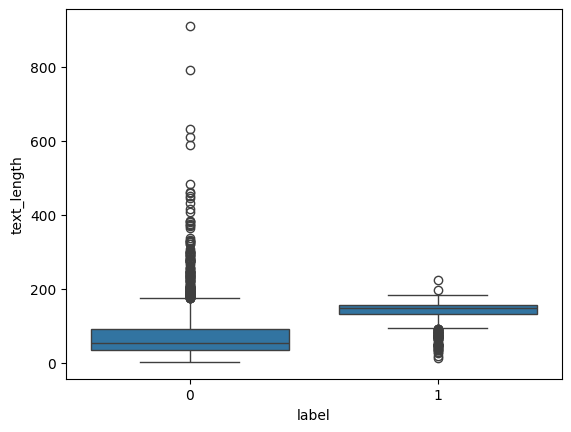

In [16]:
df['text_length']=df['text'].apply(len)
sns.boxplot(x='label',y='text_length',data=df)
plt.show()

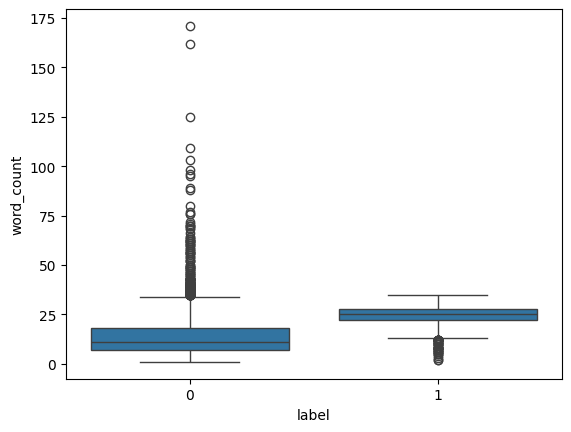

In [17]:
df['word_count']=df['text'].apply(lambda x:len(x.split()))
sns.boxplot(x='label',y='word_count',data=df)   
plt.show()

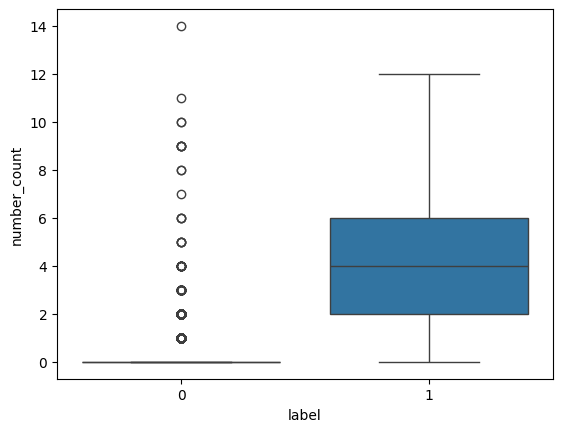

In [20]:
import re
df["number_count"] = df["text"].apply(
    lambda x: len(re.findall(r"\d+", x))
)
sns.boxplot(
    x="label",
    y="number_count",
    data=df
)
plt.show()

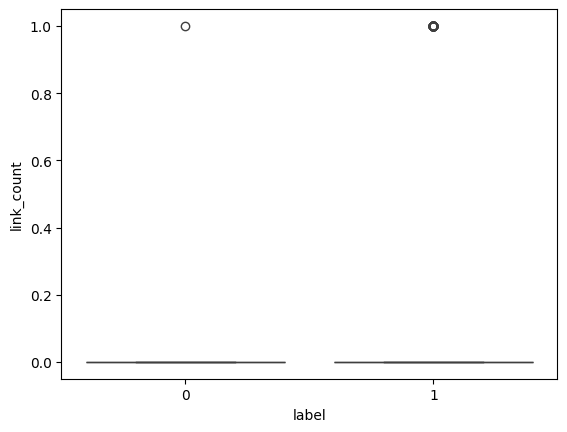

In [21]:
df["link_count"] = df["text"].apply(
    lambda x: len(re.findall(r"http[s]?://\S+|www\.\S+", x))
)
sns.boxplot(
    x="label",  
    y="link_count",
    data=df)
plt.show()

In [22]:
df.head()

,label,text,text_length,word_count,number_count,link_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0,0
1,0,Ok lar... Joking wif u oni...,29,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,6,0
3,0,U dun say so early hor... U c already then say...,49,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0


In [23]:
import re

df['clean_text'] = (
    df['text']
    .str.lower()
    .str.replace(r'[^a-z\s]', '', regex=True)
)


In [24]:
spam_text = df[df['label'] == 1]['clean_text']
ham_text  = df[df['label'] == 0]['clean_text']


In [25]:
from collections import Counter


In [26]:
spam_words = Counter(" ".join(spam_text).split())
ham_words  = Counter(" ".join(ham_text).split())

In [27]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = set(ENGLISH_STOP_WORDS)

spam_words = Counter({
    word: count
    for word, count in spam_words.items()
    if word not in stopwords and len(word) > 2
})

ham_words = Counter({
    word: count
    for word, count in ham_words.items()
    if word not in stopwords and len(word) > 2
})


In [28]:
top_spam_words = spam_words.most_common(20)
top_ham_words  = ham_words.most_common(20)


In [29]:
top_ham_words

[('just', 274),
 ('ltgt', 254),
 ('dont', 253),
 ('got', 226),
 ('know', 221),
 ('like', 219),
 ('ill', 209),
 ('come', 208),
 ('good', 205),
 ('time', 181),
 ('day', 172),
 ('love', 168),
 ('going', 162),
 ('want', 159),
 ('lor', 157),
 ('need', 152),
 ('home', 151),
 ('think', 126),
 ('sorry', 119),
 ('tell', 116)]

In [30]:
top_spam_words

[('free', 190),
 ('txt', 127),
 ('mobile', 106),
 ('stop', 106),
 ('text', 104),
 ('claim', 96),
 ('reply', 93),
 ('prize', 81),
 ('just', 66),
 ('new', 64),
 ('won', 59),
 ('urgent', 58),
 ('send', 57),
 ('nokia', 57),
 ('cash', 51),
 ('contact', 51),
 ('win', 48),
 ('service', 48),
 ('phone', 44),
 ('guaranteed', 42)]

In [31]:
import pandas as pd

spam_df = pd.DataFrame(top_spam_words, columns=['word', 'count'])
ham_df  = pd.DataFrame(top_ham_words, columns=['word', 'count'])


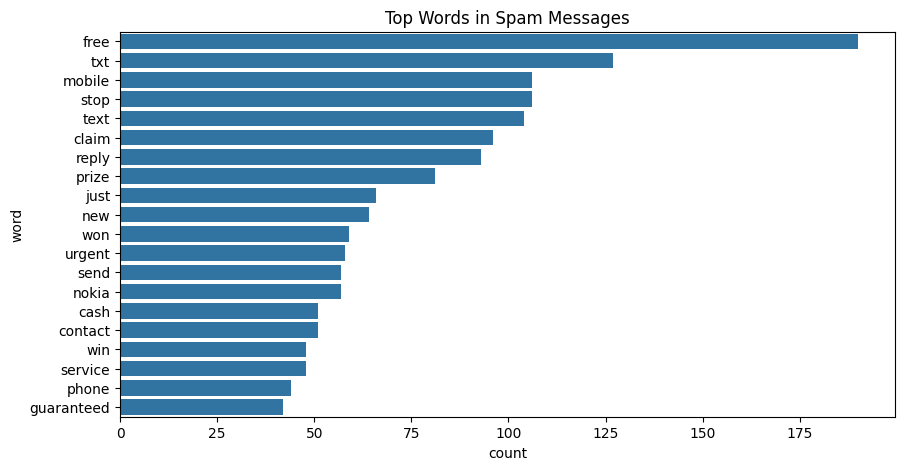

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=spam_df)
plt.title("Top Words in Spam Messages")
plt.show()


In [33]:
df.head()

,label,text,text_length,word_count,number_count,link_count,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0,0,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,6,0,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,6,0,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,49,11,0,0,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0,nah i dont think he goes to usf he lives aroun...


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5
)

X_tfidf = tfidf.fit_transform(df['text'])


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_tfidf)


In [40]:
import numpy as np

spam_idx = np.where(df['label'] == 1)[0]
ham_idx  = np.where(df['label'] == 0)[0]


spam_sim = similarity_matrix[np.ix_(spam_idx, spam_idx)]
ham_sim  = similarity_matrix[np.ix_(ham_idx, ham_idx)]

print("Avg spam similarity:", spam_sim.mean())
print("Avg ham similarity:", ham_sim.mean())


Avg spam similarity: 0.0300895354285708
Avg ham similarity: 0.008784575309998871
